In [1]:
# pip install -U googlemaps

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import config
import googlemaps

%matplotlib inline

In [3]:
matches = pd.read_csv('data/matches_1930_2022.csv', encoding='utf-8')
matches.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...


In [4]:
print("Number of World Cup Matches: ", len(matches))

Number of World Cup Matches:  964


In [5]:
matches.columns

Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'home_manager', 'home_captain',
       'away_manager', 'away_captain', 'Attendance', 'Venue', 'Officials',
       'Round', 'Date', 'Score', 'Referee', 'Notes', 'Host', 'Year',
       'home_goal', 'away_goal', 'home_goal_long', 'away_goal_long',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card', 'home_yellow_card_long',
       'away_yellow_card_long', 'home_substitute_in_long',
       'away_substitute_in_long'],
      dtype='object')

In [6]:
#store venues for each World Cup year in a dictionary
venues = {}
for year in matches['Year'].unique():
    venues[year] = list(matches['Venue'][matches['Year'] == year].unique())
    
ttl = 0

for year in venues:
    ttl += len(venues[year])

print("Total Venues: ", ttl)

Total Venues:  212


In [7]:
total_venues = {}

for year in venues:
    total_venues[year] =  len(venues[year])
    
total_venues

{2022: 8,
 2018: 12,
 2014: 12,
 2010: 10,
 2006: 12,
 2002: 20,
 1998: 10,
 1994: 9,
 1990: 13,
 1986: 12,
 1982: 17,
 1978: 6,
 1974: 9,
 1970: 5,
 1966: 8,
 1962: 4,
 1958: 12,
 1954: 6,
 1950: 6,
 1938: 10,
 1934: 8,
 1930: 3}

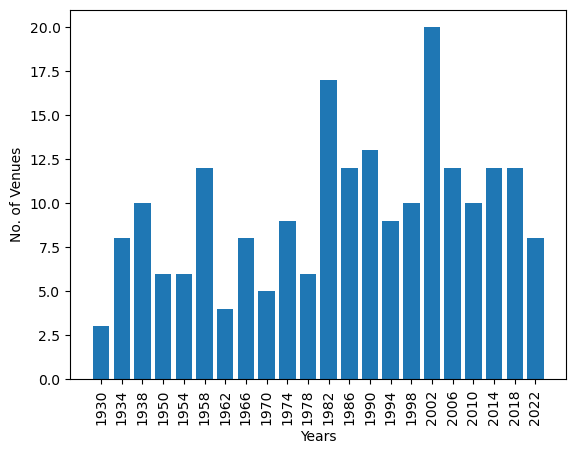

In [9]:
years = 0.5 + np.arange(22)
years_list = list(total_venues.keys())
height = list(total_venues.values())
height.reverse()
years_list.reverse()

fig, ax = plt.subplots()

ax.bar(years, height, width=0.8)
ax.set_xticks(years, years_list,rotation=90)
ax.set_xlabel('Years')
ax.set_ylabel('No. of Venues')

plt.show()

In [22]:
# total API element requests

ttl_elements = 0 

for i in total_venues.values():
    ttl_elements += i**2
    
print("Total number of element requests to gmaps API: ", ttl_elements)
print(f"Total price: ", f"${0.005*ttl_elements:.4f}")

Total number of element requests to gmaps API:  2390
Total price:  $11.9500


In [11]:
venues[2022]

['Lusail Iconic Stadium, Lusail',
 'Khalifa International Stadium, Doha',
 'Al Bayt Stadium, Al Khor',
 'Al Thumama Stadium, ath-Thumāma',
 'Education City Stadium, Doha',
 'Al Janoub Stadium, Al Wakrah',
 'Stadium 974, Doha',
 "Ahmed bin Ali Stadium, Umm al-Afā'ī"]

In [12]:
API_KEY = config.api_key

In [13]:
gmaps = googlemaps.Client(key=API_KEY)

In [14]:
# matrix = gmaps.distance_matrix(origins=venues[2022], destinations=venues[2022], units='metric')

In [15]:
matrix

{'destination_addresses': ['CFCR+75, Lusail, Qatar',
  '7C7X+C6X, Al Waab St, Doha, Qatar',
  'Al Khor, Qatar',
  'Block 331, 6GPJ+8X4, Doha, Qatar',
  '8C9H+J6W, Doha, Qatar',
  '5H6F+2J5, Al Wukair, Qatar',
  '7HQ8+G4, Doha, Qatar',
  'Gharrafat Al Rayyan, Ar-Rayyan, Qatar'],
 'origin_addresses': ['CFCR+75, Lusail, Qatar',
  '7C7X+C6X, Al Waab St, Doha, Qatar',
  'Al Khor, Qatar',
  'Block 331, 6GPJ+8X4, Doha, Qatar',
  '8C9H+J6W, Doha, Qatar',
  '5H6F+2J5, Al Wukair, Qatar',
  '7HQ8+G4, Doha, Qatar',
  'Gharrafat Al Rayyan, Ar-Rayyan, Qatar'],
 'rows': [{'elements': [{'distance': {'text': '1 m', 'value': 0},
     'duration': {'text': '1 min', 'value': 0},
     'status': 'OK'},
    {'distance': {'text': '21.4 km', 'value': 21445},
     'duration': {'text': '24 mins', 'value': 1465},
     'status': 'OK'},
    {'distance': {'text': '33.7 km', 'value': 33742},
     'duration': {'text': '25 mins', 'value': 1528},
     'status': 'OK'},
    {'distance': {'text': '28.7 km', 'value': 28698},